Packages need for the code

In [1]:
import subprocess
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import Image as IPImage, display

Download the images

In [2]:
!wget -O image1.png "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png"
!wget -O image2.png "https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png"
!wget -O image3.png "https://networkcameratech.com/wp-content/uploads/2016/10/AXISP3364_2016-Oct-27_03_50_22.png"
!wget -O Test.png "https://images.squarespace-cdn.com/content/v1/5eb9df33b77a9729b4d3b5f9/2f4bbcfd-87c2-4253-a62e-971770630976/ghost+1.png"


--2023-10-17 23:08:02--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_59_05.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1561813 (1.5M) [image/png]
Saving to: ‘image1.png’

image1.png          100%[===================>]   1.49M  1.51MB/s    in 1.0s    

2023-10-17 23:08:03 (1.51 MB/s) - ‘image1.png’ saved [1561813/1561813]

--2023-10-17 23:08:04--  https://networkcameratech.com/wp-content/uploads/2016/10/HIKVISION-DS-2CD2142FWD-I_2016-Nov-09_21_52_01.png
Resolving networkcameratech.com (networkcameratech.com)... 54.157.250.197
Connecting to networkcameratech.com (networkcameratech.com)|54.157.250.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1822995 (1.7M) [image/png]
Saving to: ‘image2.png’

image2.png          100%[======


 Open the downloaded images

In [3]:
im1 = Image.open("image1.png").convert('L')
im2 = Image.open("image2.png").convert('L')
im3 = Image.open("image3.png").convert('L')
imtest = Image.open("Test.png").convert('L')

To show the images

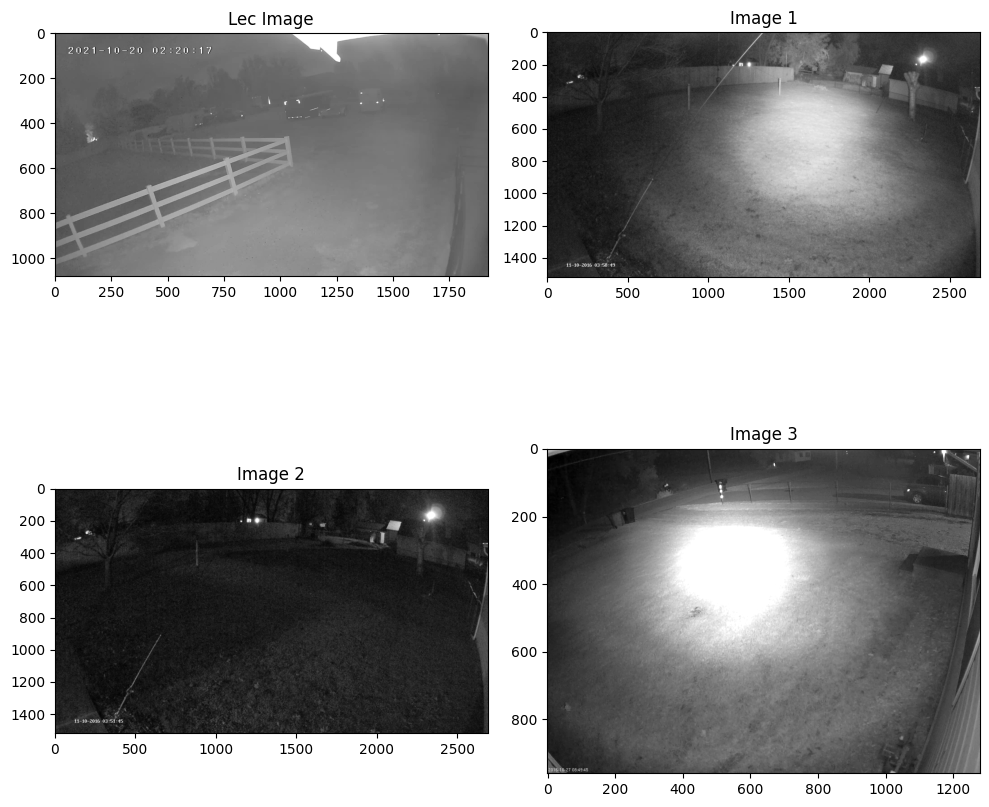

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(imtest, cmap='gray')
axs[0, 0].set_title("Lec Image")

axs[0, 1].imshow(im1, cmap='gray')
axs[0, 1].set_title("Image 1")

axs[1, 0].imshow(im2, cmap='gray')
axs[1, 0].set_title("Image 2")

axs[1, 1].imshow(im3, cmap='gray')
axs[1, 1].set_title("Image 3")

# Adjust spacing for better layout
plt.tight_layout()

# Show the 2x2 grid of images
plt.show()

CalculateCo-occurrence:
Implements the co-occurrence matrix technique as discussed in class (using the North-South orientation).



*   Input: 2D array representing the image
*  Output: 2D array representing the co-occurrence matrix.



In [ ]:
# Loop through the rows and columns of the 2D image
def compute_co_occurrence_matrix(image):
    # Get the number of unique gray levels in the test image

    # Initialize the co-occurrence matrix with zeros
    co_occurrence_matrix = np.zeros((256, 256))

    for col in range(image.shape[1]):
        for row in range(image.shape[0]):
            if row + 1 < image.shape[0]:
                co_occurrence_matrix[int (image[row, col]), int (image[row + 1, col])] += 1

    return co_occurrence_matrix

In [ ]:
imp = np.array(imtest)
co_occurrence_matrix = compute_co_occurrence_matrix(imp)

print(co_occurrence_matrix)

CalculateContrast:
Implement the contrast evaluation using the co-occurrence matrix as per the following equation:


*   Input: A co-occurrence matrix.
*   Output: The contrast evaluation.




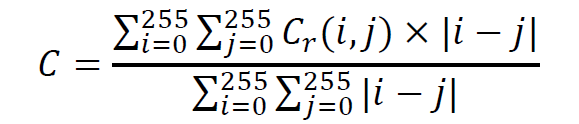

In [ ]:
def calculateContrast (co_occurrence_matrix):
    nominator = 0
    denominator = 0

    for i in range(co_occurrence_matrix.shape[1]):
        for j in range(co_occurrence_matrix.shape[0]):
            nominator += abs(i - j)  * co_occurrence_matrix[i, j]
            denominator += abs(i - j)
    return nominator / denominator


In [ ]:
c=calculateContrast(co_occurrence_matrix)
print(c)

CalculateHistogram:

*   Input: 2D array representing the image

*    Output: 1D array representing the histogram.


In [ ]:
def calculateHistogram (image):
    histogram = np.zeros(256)
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            histogram[int (image[i, j])] += 1
    return histogram

In [ ]:
h=calculateHistogram(imp)

plt.plot(h)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')

CalculateCumulativeHistogram:


*   Input: 1D array representing the histogram.
*   Output: 1D array representing the cumulative histogram.



In [ ]:
def calculateCumulativeHistogram (histogram):
    cumulative_histogram = np.zeros(256)
    cumulative_histogram[0] = histogram[0]
    for i in range(1, histogram.shape[0]):
        cumulative_histogram[i] = cumulative_histogram[i - 1] + histogram[i]
    return cumulative_histogram

In [ ]:
c_histogram=calculateCumulativeHistogram (calculateHistogram(imp))

plt.plot(c_histogram)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Cumulative Histogram')

GetColorAtPersentage

*   Input: 1D array representing the cumulative histogram, and a percentage value.
*   Output: two numbers representing color in0tensities.

In [ ]:
def getColorAtPercentage (cum_histogram, percentage):

    max = cum_histogram.shape[0] - 1
    low_end = math.ceil (max * percentage)
    high_end = math.ceil (max * (1 - percentage))
    return [low_end,high_end]

In [ ]:
cap=getColorAtPercentage(c_histogram,0.05)
print(cap)

StretchContrast:

*  Input: 2D array representing the image, and four numbers representing color intensities.
*   Output: An image presenting the effect of the contrast stretching on the input image.


In [ ]:
def stretchContrast (image, a,b,c,d ):
    a,b = getColorAtPercentage(calculateCumulativeHistogram(calculateHistogram(image)), 0.2)
    print (a,b)
    new_image = np.zeros(image.shape)
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            if image[i, j] < c:
                new_image[i, j] = a
            elif image[i, j] > d:
                new_image[i, j] = b
            else:
                new_image[i, j] = (image[i, j] - c) * ((b - a) / (d - c)) + a
    return new_image

In [ ]:
sc= stretchContrast(imp,13,243, 50, 150)

hasc=calculateHistogram(sc)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(imtest, cmap='gray')
axs[0, 0].set_title("Image Before")

axs[0, 1].imshow(sc, cmap='gray')
axs[0, 1].set_title("Image After")

axs[1, 0].plot(h)
axs[1, 0].set_title("Histogram Before")

axs[1, 1].plot(hasc)
axs[1, 1].set_title("Histogram After")

# Adjust spacing for better layout
plt.tight_layout()

# Show the 2x2 grid of images
plt.show()

EqualizeHistogram:

*   Input: 2D array representing the image, and two numbers representing color intensities.
*   Output: An image presenting the effect of the histogram equalization on the input
image.



In [ ]:
def EqualizeHistogram (img, a,b ):
    histogram = calculateHistogram(img)
    cumulative_histogram = calculateCumulativeHistogram(histogram)
    # loop over the image
    for j in range(img.shape[1]):
        for i in range(img.shape[0]):

            # if img[i, j] >=  a and img[i, j] <=b:
              img[i, j] = (cumulative_histogram[img[i, j]] - cumulative_histogram[a]) * ((b - a) / (cumulative_histogram[b] - cumulative_histogram[a])) + a

    return img

In [ ]:
eh = EqualizeHistogram(imp, 88,151)
ha=calculateCumulativeHistogram(calculateHistogram(eh))

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(imtest, cmap='gray')
axs[0, 0].set_title("Image Before")

axs[0, 1].imshow(eh, cmap='gray')
axs[0, 1].set_title("Image After")

axs[1, 0].plot(h)
axs[1, 0].set_title("Histogram Before")

axs[1, 1].plot(ha)
axs[1, 1].set_title("Histogram After")

# Adjust spacing for better layout
plt.tight_layout()

# Show the 2x2 grid of images
plt.show()

Gray-scaleTransformation:

*   Input: 2D array representing the image, and four numbers representing color intensities.
*   Output: An image presenting the effect of the gray-scale transformation on the input image.



In [ ]:
def greyScaleTransformation (img, x1,x2, y1,y2):

    new_image = np.zeros(img.shape)

    for j in range (img.shape[1]):
        for i in range (img.shape[0]):
            if img[i, j] < x1:
                new_image[i, j] = (y1/x1)*img[i, j]
            elif img[i, j] >= x2:
                new_image[i, j] =   int (((img[i, j] - x2) * (255 - y2)/(255-x2)) + y2)
            else:
                new_image[i, j] = int ( (img[i, j] - x1) * ((y2 - y1) / (x2 - x1)) + y1)

    return new_image

In [ ]:
gst= greyScaleTransformation(imp,88,151,22,220 )

In [ ]:
hag=calculateHistogram(gst)

In [ ]:
ufig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(imtest, cmap='gray')
axs[0, 0].set_title("Image Before")

axs[0, 1].imshow(gst, cmap='gray')
axs[0, 1].set_title("Image After")

axs[1, 0].plot(h)
axs[1, 0].set_title("Histogram Before")

axs[1, 1].plot(hag)
axs[1, 1].set_title("Histogram After")

# Adjust spacing for better layout
plt.tight_layout()

# Show the 2x2 grid of images
plt.show()